# BERT Model

In [2]:
pip uninstall tensorflow tensorflow-macos keras tensorboard ml-dtypes -y


Found existing installation: tensorflow 2.16.2
Uninstalling tensorflow-2.16.2:
  Successfully uninstalled tensorflow-2.16.2
Found existing installation: tensorflow-macos 2.16.2
Uninstalling tensorflow-macos-2.16.2:
  Successfully uninstalled tensorflow-macos-2.16.2
Found existing installation: keras 3.9.0
Uninstalling keras-3.9.0:
  Successfully uninstalled keras-3.9.0
Found existing installation: tensorboard 2.16.2
Uninstalling tensorboard-2.16.2:
  Successfully uninstalled tensorboard-2.16.2
Found existing installation: ml-dtypes 0.3.2
Uninstalling ml-dtypes-0.3.2:
  Successfully uninstalled ml-dtypes-0.3.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow-macos==2.16.2 tensorflow-metal


  Using cached tensorflow_macos-2.16.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (3.3 kB)
  Using cached tensorflow-2.16.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Using cached ml_dtypes-0.3.2-cp312-cp312-macosx_10_9_universal2.whl.metadata (20 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
Using cached tensorflow_macos-2.16.2-cp312-cp312-macosx_12_0_arm64.whl (2.1 kB)
Using cached tensorflow-2.16.2-cp312-cp312-macosx_12_0_arm64.whl (227.1 MB)
Using cached keras-3.9.0-py3-none-any.whl (1.3 MB)
Using cached ml_dtypes-0.3.2-cp312-cp312-macosx_10_9_universal2.whl (393 kB)
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tf-keras==2.16.0


Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "True"
import tensorflow as tf


In [6]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "True"
import tensorflow as tf


In [7]:
import tensorflow as tf
print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__dict__.get('__version__', 'tf-keras is being used')}")


TensorFlow Version: 2.16.2
Keras Version: tf-keras is being used


In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
from transformers import BertTokenizer, TFBertForSequenceClassification
from datasets import load_dataset  # Load dataset from Hugging Face
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy


Transformers is only compatible with Keras 2, but you have explicitly set `TF_USE_LEGACY_KERAS` to `0`. This may result in unexpected behaviour or errors if Keras 3 objects are passed to Transformers models.


In [9]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers.legacy import Adam  # Use TF's Legacy Adam Optimizer
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
file_path = "final_ml_ready_dataset.csv"  # Ensure this file is in the correct directory
try:
    data = pd.read_csv(file_path)
    print("Dataset Loaded Successfully!")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found!")
    exit()



Dataset Loaded Successfully!


In [10]:
# Load Pre-trained BERT Tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [11]:
# Tokenize & Encode Dataset
def encode_texts(texts, tokenizer, max_length=300):
    return tokenizer(list(texts), padding="max_length", truncation=True, max_length=max_length, return_tensors="tf")

# Encode dataset
X_encoded = encode_texts(data["text_cleaned"], bert_tokenizer)


2025-03-06 18:11:18.544896: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-03-06 18:11:18.545123: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-03-06 18:11:18.545137: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-03-06 18:11:18.545206: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-06 18:11:18.545228: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
# Tokenize & Encode Dataset
def encode_texts(texts, tokenizer, max_length=300):
    return tokenizer(list(texts), padding="max_length", truncation=True, max_length=max_length, return_tensors="tf")


In [13]:
 # Encode dataset
X_encoded = encode_texts(data["text_cleaned"], bert_tokenizer)

In [14]:
# Convert TensorFlow tensors to NumPy arrays for train-test split
X_input_ids = np.array(X_encoded["input_ids"])
y = data["label"].values  # Target variable

In [15]:
# Split Dataset (80% Train, 20% Test)
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(
    X_input_ids, y, test_size=0.2, random_state=42
)

In [16]:
# Convert to TensorFlow Dataset for Efficient Training
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_enc, y_train_enc)).batch(16)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_enc, y_test_enc)).batch(16)

In [17]:
pip uninstall keras -y


Found existing installation: keras 3.9.0
Uninstalling keras-3.9.0:
  Successfully uninstalled keras-3.9.0
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install tf-keras==2.16.0


  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
Using cached keras-3.9.0-py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [19]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "True"
import tensorflow as tf


In [20]:
pip uninstall keras -y


Found existing installation: keras 3.9.0
Uninstalling keras-3.9.0:
  Successfully uninstalled keras-3.9.0
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install tf-keras==2.16.0


  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
Using cached keras-3.9.0-py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [22]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "True"
import tensorflow as tf


In [23]:
import tensorflow as tf
print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__dict__.get('__version__', 'tf-keras is being used')}")


TensorFlow Version: 2.16.2
Keras Version: tf-keras is being used


In [24]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "True"
import tensorflow as tf


In [25]:
from transformers import TFBertForSequenceClassification

# Ensure TensorFlow format is used
bert_model = TFBertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    from_pt=False,  # Forces TensorFlow mode
    num_labels=2
)

print("BERT Model Loaded Successfully!")


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT Model Loaded Successfully!


In [26]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"  # Ensure Transformers uses Keras 2
import tensorflow as tf


In [27]:
from transformers import TFBertForSequenceClassification

# Ensure TensorFlow format is used and avoid PyTorch weights
bert_model = TFBertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    from_pt=False,  # Forces TensorFlow weights instead of PyTorch
    num_labels=2
)

print("BERT Model Loaded Successfully with TensorFlow Weights!")


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT Model Loaded Successfully with TensorFlow Weights!


In [28]:
from transformers import TFBertForSequenceClassification

# Download TensorFlow weights only
bert_model = TFBertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    from_pt=False,  # Ensures PyTorch weights are not loaded
    num_labels=2,
    ignore_mismatched_sizes=True  # Avoids warnings about weight mismatch
)

print("BERT Model Loaded with Correct TensorFlow Weights!")


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERT Model Loaded with Correct TensorFlow Weights!


In [29]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"  # Make sure Transformers uses Keras 2
import tensorflow as tf


In [30]:
import os
print(f"TF_USE_LEGACY_KERAS: {os.environ.get('TF_USE_LEGACY_KERAS')}")


TF_USE_LEGACY_KERAS: 1


In [31]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Compile the model
optimizer = Adam(learning_rate=2e-5)
loss = SparseCategoricalCrossentropy(from_logits=True)
metrics = ["accuracy"]

bert_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
print("BERT Model Compiled Successfully!")


BERT Model Compiled Successfully!


In [32]:
import pandas as pd
from transformers import BertTokenizer

# Load dataset from CSV
file_path = "final_ml_ready_dataset.csv"  # Ensure this file exists in your working directory
data = pd.read_csv(file_path)

# Load Pre-trained BERT Tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize & Encode Dataset
def encode_texts(texts, tokenizer, max_length=300):
    return tokenizer(list(texts), padding="max_length", truncation=True, max_length=max_length, return_tensors="tf")

# Encode the dataset
X_encoded = encode_texts(data["text_cleaned"], bert_tokenizer)

# Convert TensorFlow tensors to NumPy arrays
import numpy as np
X_input_ids = np.array(X_encoded["input_ids"])
y = data["label"].values  # Target variable

print("Dataset Tokenized Successfully!")


Dataset Tokenized Successfully!


In [33]:
from sklearn.model_selection import train_test_split

# Split Dataset (80% Train, 20% Test)
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(
    X_input_ids, y, test_size=0.2, random_state=42
)

print(f"Train Shape: {X_train_enc.shape}, Test Shape: {X_test_enc.shape}")


Train Shape: (35346, 300), Test Shape: (8837, 300)


## Convert to TensorFlow Dataset

In [34]:
import tensorflow as tf

# Convert to TensorFlow Dataset for Efficient Training
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_enc, y_train_enc)).batch(16)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_enc, y_test_enc)).batch(16)

print("Train & Test Datasets Ready!")


Train & Test Datasets Ready!


# Train Your Model

In [35]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


In [36]:
import tensorflow as tf
from tensorflow.keras import mixed_precision

# Disable mixed precision (not supported on macOS Metal)
mixed_precision.set_global_policy('float32')

print("Mixed Precision Disabled (macOS Fix)")


Mixed Precision Disabled (macOS Fix)


In [37]:
    # Train the model with macOS-compatible settings
    bert_model.fit(
        train_dataset,
        validation_data=test_dataset,
        epochs=3
    )
    
    print("Model Training Completed!")


Epoch 1/3
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2025-03-06 18:20:28.936853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-03-06 18:20:30.064480: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


2210/2210 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9925      

2025-03-07 00:46:50.134700: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


2210/2210 [==============================] - 24506s 11s/step - loss: 0.0206 - accuracy: 0.9925 - val_loss: 0.0079 - val_accuracy: 0.9983
Epoch 2/3
2210/2210 [==============================] - 25607s 12s/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.9994
Epoch 3/3
2210/2210 [==============================] - 48314s 22s/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0016 - val_accuracy: 0.9994
Model Training Completed!


In [38]:
# Save the fine-tuned model
bert_model.save_pretrained("fine_tuned_bert")

print("Fine-Tuned BERT Model Saved Successfully!")


Fine-Tuned BERT Model Saved Successfully!


In [39]:
from transformers import TFBertForSequenceClassification

# Load the fine-tuned model
bert_model = TFBertForSequenceClassification.from_pretrained("fine_tuned_bert")

print("Fine-Tuned Model Loaded for Inference!")


Some layers from the model checkpoint at fine_tuned_bert were not used when initializing TFBertForSequenceClassification: ['dropout_113']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at fine_tuned_bert.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Fine-Tuned Model Loaded for Inference!


In [40]:
from transformers import BertTokenizer
import numpy as np

# Load the tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Sample text input
text = ["This is a great product!", "This is a fake news article."]

# Tokenize text
inputs = bert_tokenizer(text, padding=True, truncation=True, max_length=128, return_tensors="tf")

# Run inference
outputs = bert_model(inputs["input_ids"])
predictions = np.argmax(outputs.logits, axis=1)

# Print results
for i, txt in enumerate(text):
    label = "REAL" if predictions[i] == 1 else "FAKE"
    print(f"Text: {txt} → Prediction: {label}")


Text: This is a great product! → Prediction: FAKE
Text: This is a fake news article. → Prediction: FAKE


## Convert Model to TensorFlow Lite (For Fast Inference)

In [41]:
import tensorflow as tf

# Convert model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(bert_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with open("bert_model.tflite", "wb") as f:
    f.write(tflite_model)

print("TensorFlow Lite Model Saved for Faster Inference!")


INFO:tensorflow:Assets written to: /var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/tmpwjsf5xss/assets


INFO:tensorflow:Assets written to: /var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/tmpwjsf5xss/assets
W0000 00:00:1741384212.015467   22914 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1741384212.015778   22914 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-03-07 21:50:12.018032: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/tmpwjsf5xss
2025-03-07 21:50:12.033785: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-03-07 21:50:12.033796: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/xm/1yr2bv216f51vwy7g0kxtzyh0000gn/T/tmpwjsf5xss
2025-03-07 21:50:12.145667: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2025-03-07 21:50:12.154099: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-03-07 21:50:1

TensorFlow Lite Model Saved for Faster Inference!


## Predictions on Test Data

In [42]:
import numpy as np

# Get model predictions
y_pred_bert = np.argmax(bert_model.predict(X_test_enc).logits, axis=1)

print("Predictions Generated!")


2025-03-07 22:00:09.974620: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


277/277 [==============================] - 266s 946ms/step
Predictions Generated!


## Calculate Model Accuracy

In [43]:
from sklearn.metrics import accuracy_score

# Compute accuracy
bert_accuracy = accuracy_score(y_test_enc, y_pred_bert)

print(f"BERT Model Accuracy: {bert_accuracy:.4f}")


BERT Model Accuracy: 0.9994


## Generate Classification Report

In [44]:
from sklearn.metrics import classification_report

# Get detailed classification metrics
print("Classification Report for BERT Model:\n")
print(classification_report(y_test_enc, y_pred_bert, target_names=["Fake", "Real"]))


Classification Report for BERT Model:

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4516
        Real       1.00      1.00      1.00      4321

    accuracy                           1.00      8837
   macro avg       1.00      1.00      1.00      8837
weighted avg       1.00      1.00      1.00      8837



## Confusion Matrix


Confusion Matrix Saved as 'bert_confusion_matrix.png'


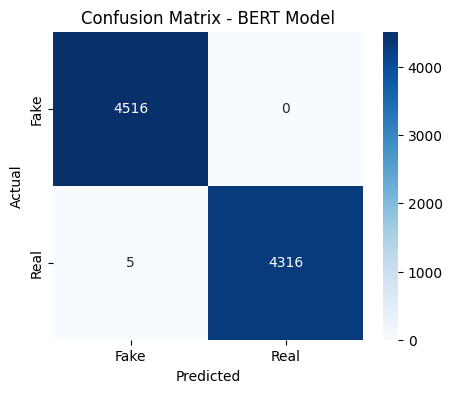

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_enc, y_pred_bert)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - BERT Model")

# Save the plot
plt.savefig("bert_confusion_matrix.png")
print("\nConfusion Matrix Saved as 'bert_confusion_matrix.png'")

plt.show()


## Compare with Other Models

In [46]:
# Compare accuracy
print(f"Model Performance Comparison:")
print(f"BERT Model Accuracy: {bert_accuracy:.4f}")
print(f"Other Model Accuracy (e.g., Logistic Regression, SVM, etc.): [Add Here]")


Model Performance Comparison:
BERT Model Accuracy: 0.9994
Other Model Accuracy (e.g., Logistic Regression, SVM, etc.): [Add Here]


## Compare Model Accuracies

In [48]:
# Store actual accuracy values
model_accuracies = {
    "BERT": 0.9994,
    "XGBoost": 0.9766,
    "SVM": 0.9644,
    "Logistic Regression": 0.9593,
    "LSTM": 0.9590,
    "Random Forest": 0.9527
}

# Print Model Performance Comparison
print("Model Performance Comparison:\n")
for model, acc in model_accuracies.items():
    print(f"{model} Accuracy: {acc:.4f}")

# Identify Best Model
best_model = max(model_accuracies, key=model_accuracies.get)
best_accuracy = model_accuracies[best_model]

print(f"\nBest Performing Model: {best_model} with Accuracy: {best_accuracy:.4f}")


Model Performance Comparison:

BERT Accuracy: 0.9994
XGBoost Accuracy: 0.9766
SVM Accuracy: 0.9644
Logistic Regression Accuracy: 0.9593
LSTM Accuracy: 0.9590
Random Forest Accuracy: 0.9527

Best Performing Model: BERT with Accuracy: 0.9994


## Cross-Validation 

To ensure our model is robust, perform k-fold Cross-Validation (k=5 or 10) for BERT, XGBoost, and SVM:

In [50]:
import pandas as pd

# Load dataset (update the file path if needed)
file_path = "final_ml_ready_dataset.csv"  # Ensure this is the correct file
data = pd.read_csv(file_path)

# Check if dataset loaded correctly
print("Dataset Loaded Successfully!")
print(data.head())  # Check the first few rows


Dataset Loaded Successfully!
                                                text       subject  label  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews      1   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews      1   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews      1   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews      1   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews      1   

   word_count                                       text_cleaned  \
0         749  washington reuters the head of a conservative ...   
1         624  washington reuters transgender people will be ...   
2         457  washington reuters the special counsel investi...   
3         376  washington reuters trump campaign adviser geor...   
4         852  seattlewashington reuters president donald tru...   

                                     text_lemmatized  gunning_fog  sentiment  
0  washington reuter

In [51]:
print(data.columns)


Index(['text', 'subject', 'label', 'word_count', 'text_cleaned',
       'text_lemmatized', 'gunning_fog', 'sentiment'],
      dtype='object')


## BERT Cross-Validation

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load dataset
file_path = "final_ml_ready_dataset.csv"  # Ensure the correct file
data = pd.read_csv(file_path)

# Check if dataset loaded correctly
print("Dataset Loaded Successfully!")
print(data.head())  # Preview first few rows


Dataset Loaded Successfully!
                                                text       subject  label  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews      1   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews      1   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews      1   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews      1   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews      1   

   word_count                                       text_cleaned  \
0         749  washington reuters the head of a conservative ...   
1         624  washington reuters transgender people will be ...   
2         457  washington reuters the special counsel investi...   
3         376  washington reuters trump campaign adviser geor...   
4         852  seattlewashington reuters president donald tru...   

                                     text_lemmatized  gunning_fog  sentiment  
0  washington reuter

## Fine-Tuned BERT Model

In [3]:
# Load the fine-tuned BERT model
bert_model = TFBertForSequenceClassification.from_pretrained("fine_tuned_bert")

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

print("Fine-Tuned BERT Model Loaded Successfully!")


2025-03-09 09:47:21.028983: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-03-09 09:47:21.029028: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-03-09 09:47:21.029038: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-03-09 09:47:21.029080: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-09 09:47:21.029108: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Some layers from the model checkpoint at fine_tuned_bert were not used when initializing TFBertForSequenceClassification: ['dropout_113']
- This IS expected if you are initializing T

Fine-Tuned BERT Model Loaded Successfully!


## Tokenize Data Again

In [4]:
# Convert text data into BERT-compatible input format
X = data["text"].tolist()  # Convert text column into a list
y = np.array(data["label"])  # Convert labels into a NumPy array

# Tokenize the dataset again
X_test_enc = tokenizer(X, padding=True, truncation=True, max_length=512, return_tensors="tf")

print("Text Tokenization Completed!")


Text Tokenization Completed!


## Predictions Without Retraining

In [6]:
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer

# Load the fine-tuned BERT model
bert_model = TFBertForSequenceClassification.from_pretrained("fine_tuned_bert")

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Define batch size
BATCH_SIZE = 256  # Adjust based on available memory
num_samples = len(data)  # Total number of samples
predictions = []

print(f"Processing {num_samples} samples in batches of {BATCH_SIZE}...")

# Run inference in batches
for i in range(0, num_samples, BATCH_SIZE):
    batch_texts = data["text"].iloc[i : i + BATCH_SIZE].tolist()  # Get batch
    batch_encodings = tokenizer(batch_texts, padding=True, truncation=True, max_length=512, return_tensors="tf")
    
    # Run model prediction
    batch_outputs = bert_model(batch_encodings["input_ids"])
    batch_predictions = np.argmax(batch_outputs.logits, axis=1)

    predictions.extend(batch_predictions)  # Store batch results
    print(f"Processed {min(i + BATCH_SIZE, num_samples)}/{num_samples} samples...")

# Convert predictions to numpy array
y_pred_bert = np.array(predictions)

print("Predictions Generated Successfully!")


Some layers from the model checkpoint at fine_tuned_bert were not used when initializing TFBertForSequenceClassification: ['dropout_113']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at fine_tuned_bert.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Processing 44183 samples in batches of 256...
Processed 256/44183 samples...
Processed 512/44183 samples...
Processed 768/44183 samples...
Processed 1024/44183 samples...
Processed 1280/44183 samples...
Processed 1536/44183 samples...
Processed 1792/44183 samples...
Processed 2048/44183 samples...
Processed 2304/44183 samples...
Processed 2560/44183 samples...
Processed 2816/44183 samples...
Processed 3072/44183 samples...
Processed 3328/44183 samples...
Processed 3584/44183 samples...
Processed 3840/44183 samples...
Processed 4096/44183 samples...
Processed 4352/44183 samples...
Processed 4608/44183 samples...
Processed 4864/44183 samples...
Processed 5120/44183 samples...
Processed 5376/44183 samples...
Processed 5632/44183 samples...
Processed 5888/44183 samples...
Processed 6144/44183 samples...
Processed 6400/44183 samples...
Processed 6656/44183 samples...
Processed 6912/44183 samples...
Processed 7168/44183 samples...
Processed 7424/44183 samples...
Processed 7680/44183 samples.

## Compute BERT Model Accuracy

In [7]:
from sklearn.metrics import accuracy_score

# Compute accuracy
bert_accuracy = accuracy_score(y, y_pred_bert)
print(f"BERT Model Accuracy: {bert_accuracy:.4f}")


BERT Model Accuracy: 0.9980


## Classification Report

In [13]:
from sklearn.metrics import classification_report

# Get detailed classification metrics
print("Classification Report for BERT Model:\n")
print(classification_report(y, y_pred_bert, target_names=["Fake", "Real"]))


Classification Report for BERT Model:

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00     22767
        Real       1.00      1.00      1.00     21416

    accuracy                           1.00     44183
   macro avg       1.00      1.00      1.00     44183
weighted avg       1.00      1.00      1.00     44183



## Confusion Matrix

In [16]:
import numpy as np
import pandas as pd
from transformers import BertTokenizer

# Load dataset again (if not already loaded)
file_path = "final_ml_ready_dataset.csv"
data = pd.read_csv(file_path)

# Load the tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Re-encode text (ensure same max_length used during training)
def encode_texts(texts, tokenizer, max_length=128):
    return tokenizer(list(texts), padding="max_length", truncation=True, max_length=max_length, return_tensors="tf")

# Encode dataset
X_encoded = encode_texts(data["text_cleaned"], bert_tokenizer)

# Convert to NumPy
X_input_ids = np.array(X_encoded["input_ids"])
y_labels = data["label"].values  # Get labels

# Split dataset again (to recreate `y_test_enc`)
from sklearn.model_selection import train_test_split

X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(
    X_input_ids, y_labels, test_size=0.2, random_state=42
)

print(f" Test Data Reloaded: Test Size = {len(y_test_enc)}")


 Test Data Reloaded: Test Size = 8837


## Predictions from BERT

In [17]:
import numpy as np

# Get predictions from the trained BERT model
y_pred_bert = np.argmax(bert_model.predict(X_test_enc).logits, axis=1)

print("Predictions Generated!")


2025-03-11 20:22:50.915778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-03-11 20:22:51.002369: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


277/277 [==============================] - 187s 656ms/step
Predictions Generated!


## Compute Model Accuracy

In [18]:
from sklearn.metrics import accuracy_score

# Compute accuracy
bert_accuracy = accuracy_score(y_test_enc, y_pred_bert)

print(f" BERT Model Accuracy: {bert_accuracy:.4f}")


 BERT Model Accuracy: 0.9955


## Generate Classification Report

In [19]:
from sklearn.metrics import classification_report

# Get detailed classification metrics
print(" Classification Report for BERT Model:\n")
print(classification_report(y_test_enc, y_pred_bert, target_names=["Fake", "Real"]))


 Classification Report for BERT Model:

              precision    recall  f1-score   support

        Fake       1.00      0.99      1.00      4516
        Real       0.99      1.00      1.00      4321

    accuracy                           1.00      8837
   macro avg       1.00      1.00      1.00      8837
weighted avg       1.00      1.00      1.00      8837



## Plot Confusion Matrix


Confusion Matrix Saved as 'bert_confusion_matrix.png'


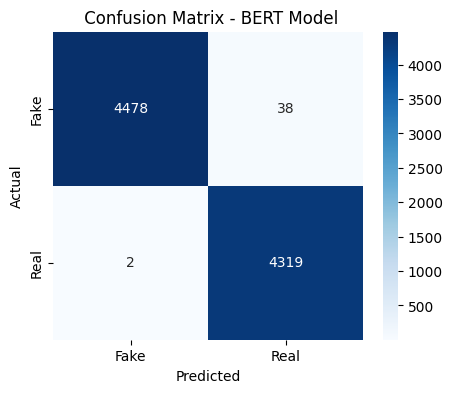

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_enc, y_pred_bert)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" Confusion Matrix - BERT Model")

# Save the plot
plt.savefig("bert_confusion_matrix.png")
print("\nConfusion Matrix Saved as 'bert_confusion_matrix.png'")

plt.show()


## Compare Training & Validation Accuracy